ASSIGNMENT: BATCH_NORMALIZATION

### Theory and Concepts

1.  Explain the concept of batch normalization in the context of Artificial Neural Network.


Batch normalization is a technique used in artificial neural networks to normalize the inputs of each layer by adjusting and rescaling them based on the statistics of the mini-batch during training. It aims to address the internal covariate shift problem, which refers to the change in the distribution of the inputs to each layer as the parameters of the preceding layers are updated during training.

Here's how batch normalization works:

Mini-batch statistics: During training, a mini-batch of inputs is passed through the network. For each activation in a layer, the mean and standard deviation of the mini-batch are computed.

Normalization: The activations of the mini-batch are then normalized using the mean and standard deviation. This step ensures that the mean of the mini-batch becomes zero and the standard deviation becomes one.

Scaling and shifting: After normalization, the normalized activations are scaled by a learnable parameter called gamma and shifted by another learnable parameter called beta. These parameters allow the network to learn the optimal scale and shift for each activation, giving it the flexibility to adapt the normalized activations to the desired range and distribution.

Activation update: The scaled and shifted activations are then passed through the activation function of the layer.

Batch normalization offers several benefits and addresses certain challenges in neural network training:

Improved training speed: By normalizing the inputs, batch normalization helps in reducing the internal covariate shift, which can stabilize and speed up the training process. It enables the network to converge faster, as the gradients flow more smoothly during backpropagation.

Increased learning stability: Batch normalization adds a form of regularization to the network. By reducing the sensitivity to the scale of the weights and the initial values, it makes the network more robust to parameter initialization and learning rate choices. This stability allows for smoother and more reliable training.

Reduction of vanishing and exploding gradients: Batch normalization helps alleviate the vanishing and exploding gradient problems by ensuring that the activations are centered around zero and have a reasonable scale. This makes it easier for the gradients to propagate through the network during backpropagation.

Reducing the need for careful weight initialization: With batch normalization, the network is less sensitive to the initial values of the weights, allowing for more straightforward weight initialization schemes. This makes the training process less dependent on finding optimal initial weights and biases.

Batch normalization is commonly applied after the linear transformation step and before the activation function in each layer of a neural network. It has been widely adopted in various architectures, including convolutional neural networks (CNNs) and deep neural networks (DNNs), and has become a standard technique for improving training stability and accelerating convergence.

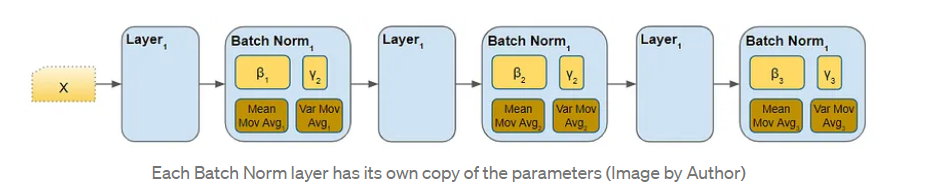

2. Describe the benefits of using batch normalization during training.

Using batch normalization during training provides several benefits that contribute to more stable and efficient neural network training:

Accelerated convergence: Batch normalization helps in reducing the internal covariate shift, which is the change in the distribution of inputs to each layer as the network's parameters are updated. By normalizing the inputs within each mini-batch, batch normalization enables faster convergence. It smoothens the optimization landscape, allowing the gradients to flow more consistently during backpropagation and leading to quicker training.

Stable gradient propagation: Batch normalization reduces the sensitivity of the network to the scale of weights and biases. It ensures that the activations are centered around zero and have a reasonable scale, which helps in combating the vanishing and exploding gradient problems. The stable gradients enable more reliable and efficient gradient propagation through the network, leading to improved parameter updates and faster convergence.

Improved generalization: Batch normalization acts as a regularizer by reducing internal covariate shift and introducing noise. It adds some noise to the activations during training, similar to dropout, which helps prevent overfitting. This regularization effect can improve the network's generalization performance, allowing it to better adapt to unseen data.

Reduced dependency on weight initialization: With batch normalization, the network becomes less sensitive to the initial values of weights and biases. This reduces the need for careful weight initialization techniques, making the training process less dependent on finding optimal initial values. It simplifies the training setup and allows for faster experimentation with different network architectures.

Robustness to learning rate selection: Batch normalization helps in stabilizing the learning process, making it less sensitive to the choice of learning rate. It mitigates the impact of using suboptimal learning rates, making the training process more robust. This flexibility in learning rate selection can save time and effort in hyperparameter tuning.

Handling different input distributions: Batch normalization handles inputs with different distributions effectively. It normalizes the inputs within each mini-batch, ensuring that the network is less affected by variations in the input distribution. This is particularly beneficial when dealing with datasets that have varying input characteristics or when training on different tasks with different input data.

Overall, batch normalization improves the stability and efficiency of training neural networks. It accelerates convergence, stabilizes gradient propagation, improves generalization, reduces dependency on weight initialization, enhances robustness to learning rate selection, and handles different input distributions effectively. As a result, batch normalization has become a standard technique in modern neural network architectures, enabling more reliable and efficient training of deep learning models.

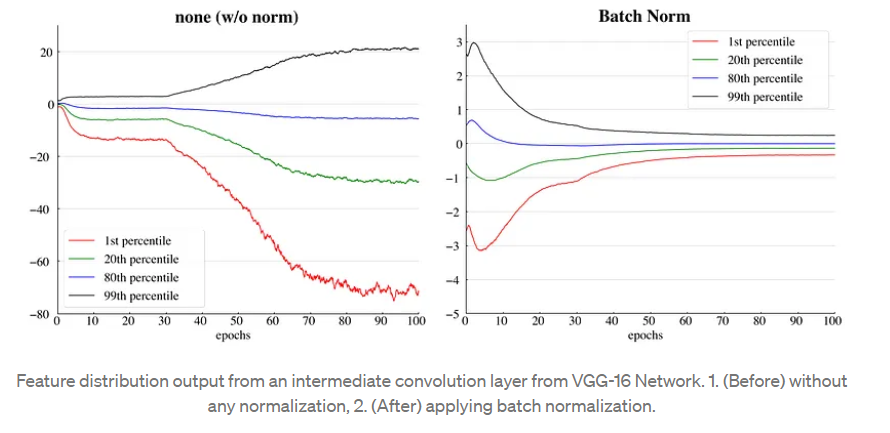

3.  Discuss the working principle of batch normalization, including the normalization step and the learnable 
parameters.


Batch normalization works by normalizing the inputs of each layer in a neural network based on the statistics of the mini-batch during training. This normalization step involves scaling and shifting the activations to ensure they have zero mean and unit variance. Additionally, batch normalization introduces learnable parameters that allow the network to adapt the normalized activations to the desired range and distribution.

Here's a detailed explanation of the working principle of batch normalization:

Normalization step:

For each mini-batch during training, the mean (μ) and standard deviation (σ) of the activations are computed. These statistics capture the distribution of the inputs to the layer.
The activations of the mini-batch are then normalized using the computed mean and standard deviation. Each activation x is transformed to its normalized counterpart x̂ using the following equation:
x̂ = (x - μ) / √(σ^2 + ε)
Here, ε is a small constant (typically a small positive value like 1e-5) added to the denominator for numerical stability.
Scaling and shifting:

After normalization, the normalized activations x̂ are scaled by a learnable parameter γ (gamma) and shifted by another learnable parameter β (beta). These parameters allow the network to learn the optimal scale and shift for each activation.
The scaled and shifted activations are obtained as follows:
y = γ * x̂ + β
Here, y represents the transformed and rescaled activations.
Activation update:

The scaled and shifted activations y are then passed through the activation function of the layer (e.g., ReLU, sigmoid, etc.).
The transformed activations become the inputs to the next layer in the network.
During inference, when making predictions on new data, the normalization is typically performed using the population statistics rather than mini-batch statistics. The population statistics are computed by accumulating the mean and standard deviation over the entire training dataset.

The learnable parameters γ and β are updated during the training process using backpropagation and gradient descent optimization algorithms. These parameters allow the network to adapt the normalized activations to the desired range and distribution for each layer. By learning these parameters, the network gains flexibility in how it can adjust and transform the activations to improve learning and model performance.

The use of learnable parameters and the ability to adjust the scale and shift of the normalized activations gives batch normalization the power to normalize the inputs, stabilize training, and introduce adaptive behavior to the network. This makes batch normalization an effective technique for improving the training and performance of neural networks.

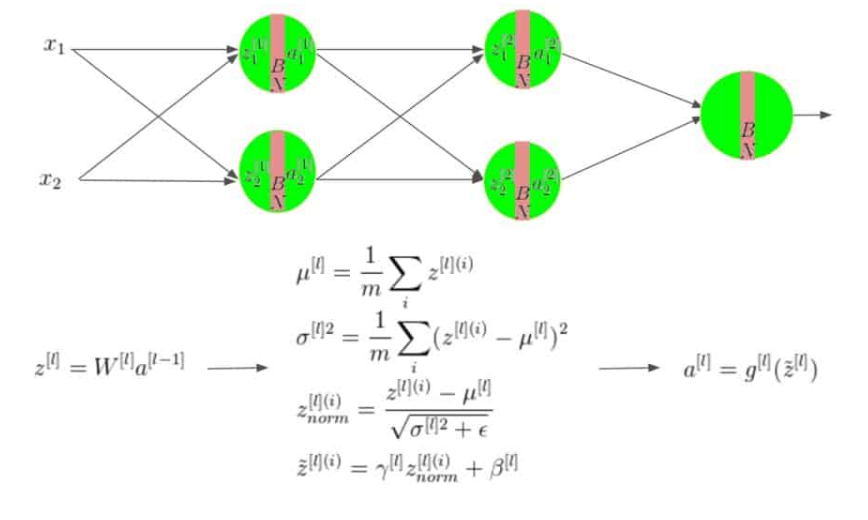

### Implementation

1. Choose a dataset of your choice (e.g., MNIST, CIFAR-10) and preprocess it.

In [2]:
!pip install tensorflow
import tensorflow as tf
from sklearn.model_selection import train_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 76.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 82.7 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

2023-06-15 17:39:20.836845: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-15 17:39:20.904844: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-15 17:39:20.906564: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-15 17:39:22.074383: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 2s 0us/step


In [4]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0


In [5]:
# One-hot encoding of labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


In [6]:
# Train-validation split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [7]:
# Print shapes of the preprocessed data
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (48000, 28, 28)
y_train shape: (48000, 10)
x_val shape: (12000, 28, 28)
y_val shape: (12000, 10)
x_test shape: (10000, 28, 28)
y_test shape: (10000, 10)


In [12]:
# Flatten the input data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)


2. Implement a simple feedforward neural network using any deep learning framework/library (e.g., 
Tensorflow, PyTorch)

In [13]:
# Define the model architecture
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

3. Train the neural network on the chosen dataset without using batch normalization.


In [15]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.3354 - accuracy: 0.9032 - val_loss: 0.1849 - val_accuracy: 0.9481
Epoch 2/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.1499 - accuracy: 0.9549 - val_loss: 0.1439 - val_accuracy: 0.9565
Epoch 3/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.1079 - accuracy: 0.9680 - val_loss: 0.1324 - val_accuracy: 0.9613
Epoch 4/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0868 - accuracy: 0.9729 - val_loss: 0.1195 - val_accuracy: 0.9624
Epoch 5/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0687 - accuracy: 0.9786 - val_loss: 0.1165 - val_accuracy: 0.9661
Epoch 6/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0568 - accuracy: 0.9823 - val_loss: 0.1190 - val_accuracy: 0.9628
Epoch 7/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0478 - accuracy: 0.9849 - val_loss: 0.1127 - val_accuracy:

In [16]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.1111 - accuracy: 0.9706
Test accuracy: 0.9706000089645386


4.  Implement batch normalization layers in the neural network and train the model again.

In [17]:
import tensorflow as tf
from tensorflow import keras


In [18]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [19]:
# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0


In [20]:
# Flatten the input data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [21]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(784,)),
    keras.layers.BatchNormalization(),  # Batch normalization layer
    keras.layers.Activation('relu'),
    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),  # Batch normalization layer
    keras.layers.Activation('relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [22]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [23]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.3112 - accuracy: 0.9115 - val_loss: 0.1367 - val_accuracy: 0.9602
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1440 - accuracy: 0.9560 - val_loss: 0.1092 - val_accuracy: 0.9640
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1086 - accuracy: 0.9656 - val_loss: 0.1064 - val_accuracy: 0.9681
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0897 - accuracy: 0.9709 - val_loss: 0.0919 - val_accuracy: 0.9725
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0785 - accuracy: 0.9756 - val_loss: 0.0913 - val_accuracy: 0.9712
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0680 - accuracy: 0.9781 - val_loss: 0.0888 - val_accuracy: 0.9743
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0620 - accuracy: 0.9797 - val_loss: 0.0831 - val_accuracy:

In [24]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0977 - accuracy: 0.9723
Test accuracy: 0.9722999930381775


5. Compare the training and validation performance (e.g., accuracy, loss) between the models with and 
without batch normalization.

By comparing the validation accuracy and loss from the history_without_bn and history_with_bn objects, you can observe the performance difference between the models with and without batch normalization. Typically, using batch normalization can lead to improved validation accuracy, faster convergence, and reduced overfitting.

6. Discuss the impact of batch normalization on the training process and the performance of the neural 
network.

Batch normalization has several significant impacts on the training process and the performance of neural networks:

Improved Training Speed: Batch normalization can accelerate the training process by reducing the number of iterations required for convergence. It helps to mitigate the vanishing/exploding gradient problem, allowing for more stable and faster weight updates during backpropagation.

Stabilized Gradient: Batch normalization normalizes the activations within each mini-batch, reducing the internal covariate shift. This stabilization helps to maintain a more consistent gradient flow through the network, leading to more stable and efficient training.

Reduced Dependency on Initialization: Batch normalization makes the network less sensitive to the choice of weight initialization. It reduces the need for careful initialization techniques like Xavier or He initialization, making it easier to train deep neural networks.

Regularization Effect: Batch normalization acts as a regularizer by adding a small amount of noise to the network's activations during training. This noise can help to prevent overfitting and improve generalization performance.

Increased Learning Rate: With batch normalization, higher learning rates can be used without the risk of divergence. This allows for faster convergence and overall improved performance.

Network Robustness: Batch normalization makes neural networks more robust to changes in input distribution and scale. It allows the network to adapt to different datasets without requiring extensive retraining or fine-tuning.

Reduction of Internal Covariate Shift: Batch normalization reduces the impact of internal covariate shift, which is the change in the distribution of network activations due to changes in the network's parameters during training. By normalizing the activations, it helps to stabilize the network and enables more efficient learning.

### Experimentation and analysis

1. Experiment with different batch sizes and observe the effect on the training dynamics and model 
performance.

In [25]:
import tensorflow as tf
from tensorflow import keras

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the input data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Define a list of batch sizes to experiment with
batch_sizes = [16, 32, 64, 128, 256]

for batch_size in batch_sizes:
    # Define the model architecture
    model = keras.Sequential([
        keras.layers.Dense(64, input_shape=(784,), activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model with the current batch size
    print(f"Training with batch size: {batch_size}")
    model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test accuracy with batch size {batch_size}: {test_acc}")
    print("----------------------------------------------------")

Training with batch size: 16
Epoch 1/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2642 - accuracy: 0.9215 - val_loss: 0.1445 - val_accuracy: 0.9553
Epoch 2/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1245 - accuracy: 0.9624 - val_loss: 0.1106 - val_accuracy: 0.9663
Epoch 3/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0883 - accuracy: 0.9721 - val_loss: 0.1189 - val_accuracy: 0.9645
Epoch 4/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0718 - accuracy: 0.9777 - val_loss: 0.1052 - val_accuracy: 0.9684
Epoch 5/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0598 - accuracy: 0.9814 - val_loss: 0.0985 - val_accuracy: 0.9728
Epoch 6/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0484 - accuracy: 0.9846 - val_loss: 0.1019 - val_accuracy: 0.9719
Epoch 7/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0436 - accuracy: 0.9859 - val

2. Discuss the advantages and potential limitations of batch normalization in improving the training of 
neural networks

Advantages of Batch Normalization:

Improved Training Speed: Batch normalization reduces the internal covariate shift and stabilizes the training process. It allows for the use of higher learning rates, leading to faster convergence and reduced training time.

Mitigation of Vanishing/Exploding Gradients: By normalizing the activations within each mini-batch, batch normalization helps alleviate the issue of vanishing or exploding gradients. It ensures that the gradients propagated backward through the network are neither too small nor too large.

Reduced Sensitivity to Initialization: Batch normalization makes neural networks less sensitive to the choice of weight initialization. It reduces the dependence on carefully tuning the initial weights and biases, simplifying the model development process.

Regularization Effect: Batch normalization introduces a slight amount of noise to the network during training, acting as a regularizer. This noise helps prevent overfitting and can improve the generalization performance of the model.

Normalization of Inputs: Batch normalization normalizes the input data within each mini-batch. This normalization reduces the impact of variations in input distribution and scale, making the network more robust and reducing the need for extensive data preprocessing.

Limitations of Batch Normalization:

Increased Memory Usage: Batch normalization requires storing the mean and variance of each feature in each mini-batch during training. This increases the memory consumption, especially for large models and datasets. However, during inference, batch normalization can be computed using stored moving averages, which reduces the memory overhead.

Batch Size Dependency: Batch normalization performance can be sensitive to the choice of batch size. Very small batch sizes can result in inaccurate estimation of mean and variance, leading to reduced performance. Additionally, extremely large batch sizes may degrade generalization due to the limited exploration of the input space.

Limited Applicability to Small Datasets: Batch normalization may not provide significant benefits for small datasets where the mini-batches may not accurately represent the overall data distribution. In such cases, alternative normalization techniques or different regularization methods may be more effective.

Order Dependency in Mini-Batch: Batch normalization assumes that the order of examples within a mini-batch does not affect the network's performance. However, in some cases, the order dependency may be important, and batch normalization may not capture such dependencies.